<a href="https://colab.research.google.com/github/itss-omkar/Coding-Ninjas/blob/main/Coding_ninjas_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

if uploaded:
  for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')
else:
  print("No file was uploaded.")

Saving Employee_Performance_Retention.csv to Employee_Performance_Retention (4).csv
User uploaded file "Employee_Performance_Retention (4).csv" with length 352290 bytes


In [ ]:
import io

# Assuming only one file was uploaded, get the filename
filename = next(iter(uploaded))

# Read the uploaded CSV file into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display the first few rows of the DataFrame
display(df.head())

,Employee_ID,Age,Department,Years_of_Experience,Monthly_Working_Hours,Training_Hours_per_Year,Performance_Rating,Job_Satisfaction_Level,Promotion_in_Last_2_Years,Attrition
0,E1000,59,Sales,27,135,30,3,Medium,Yes,No
1,E1001,49,Tech,13,132,36,5,Medium,Yes,Yes
2,E1002,35,Operations,16,197,11,5,Low,No,No
3,E1003,28,HR,23,204,36,3,High,No,No
4,E1004,41,Operations,33,192,36,2,Medium,No,No


In [ ]:
# Train-Test split
X = df.drop(["Attrition", "Employee_ID"], axis=1)
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#  Scale features
scaler = StandardScaler()

# Select only numerical columns for scaling
numerical_cols_train = X_train.select_dtypes(include=np.number)
numerical_cols_test = X_test.select_dtypes(include=np.number)


X_train_scaled = scaler.fit_transform(numerical_cols_train)
X_test_scaled = scaler.transform(numerical_cols_test)

# If you have non-numerical columns that you want to keep (they should be encoded already),
# you would need to rejoin them here. However, based on your current flow, all relevant
# columns should be numerical after encoding and before scaling the purely numerical ones.
# Let's assume for now that X_train_scaled and X_test_scaled are the complete feature sets
# after scaling the numerical parts.

# Convert scaled arrays back to DataFrames to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_cols_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_cols_test.columns, index=X_test.index)

display(X_train_scaled.head())
display(X_test_scaled.head())

,Age,Years_of_Experience,Monthly_Working_Hours,Training_Hours_per_Year,Performance_Rating
7690,1.420594,1.393532,-0.846860,1.009590,1.734291
4604,-1.707975,-1.398157,-0.501298,0.801563,-1.907796
989,-0.903486,-0.899641,-0.341807,-1.001346,-1.907796
1925,-0.903486,1.692642,-0.900023,-0.932004,-0.086752
883,-0.098997,-0.700235,-1.405076,1.356304,-0.086752


,Age,Years_of_Experience,Monthly_Working_Hours,Training_Hours_per_Year,Performance_Rating
1107,-0.992874,1.094423,-0.926605,1.217618,-0.086752
7815,-0.992874,0.695610,-0.527879,-0.099892,0.823769
8177,-0.367160,0.695610,-1.537984,-0.307920,0.823769
373,-0.367160,0.496203,-0.421553,0.524192,-0.086752
8121,0.347942,-1.298454,-0.926605,-0.377263,-1.907796


In [ ]:
# Preprocessing: Label Encoding for categorical features
label_cols = ["Department", "Job_Satisfaction_Level", "Promotion_in_Last_2_Years", "Attrition"]
encoder = LabelEncoder()
for col in label_cols:
    # Fit and transform on the entire dataset before splitting
    df[col] = encoder.fit_transform(df[col])

# Display the first few rows of the DataFrame after encoding
display(df.head())

,Employee_ID,Age,Department,Years_of_Experience,Monthly_Working_Hours,Training_Hours_per_Year,Performance_Rating,Job_Satisfaction_Level,Promotion_in_Last_2_Years,Attrition
0,E1000,59,3,27,135,30,3,2,1,0
1,E1001,49,4,13,132,36,5,2,1,1
2,E1002,35,2,16,197,11,5,1,0,0
3,E1003,28,1,23,204,36,3,0,0,0
4,E1004,41,2,33,192,36,2,2,0,0


In [ ]:
# Preprocessing: Scaling numerical features
# Identify numerical columns from X_train (which is already encoded)
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Convert scaled arrays back to DataFrames to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)


display(X_train_scaled.head())
display(X_test_scaled.head())

,Age,Years_of_Experience,Monthly_Working_Hours,Training_Hours_per_Year,Performance_Rating
7690,1.420594,1.393532,-0.846860,1.009590,1.734291
4604,-1.707975,-1.398157,-0.501298,0.801563,-1.907796
989,-0.903486,-0.899641,-0.341807,-1.001346,-1.907796
1925,-0.903486,1.692642,-0.900023,-0.932004,-0.086752
883,-0.098997,-0.700235,-1.405076,1.356304,-0.086752


,Age,Years_of_Experience,Monthly_Working_Hours,Training_Hours_per_Year,Performance_Rating
1107,-0.992874,1.094423,-0.926605,1.217618,-0.086752
7815,-0.992874,0.695610,-0.527879,-0.099892,0.823769
8177,-0.367160,0.695610,-1.537984,-0.307920,0.823769
373,-0.367160,0.496203,-0.421553,0.524192,-0.086752
8121,0.347942,-1.298454,-0.926605,-0.377263,-1.907796



🔹 Training SVM with linear kernel...


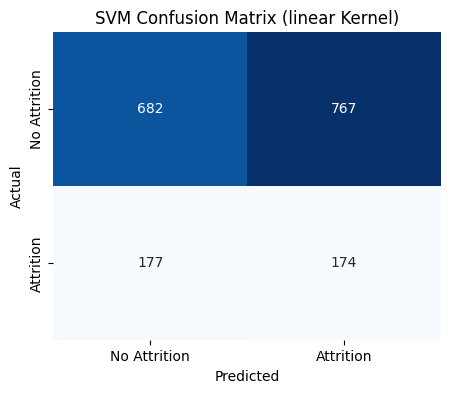


🔹 Training SVM with rbf kernel...


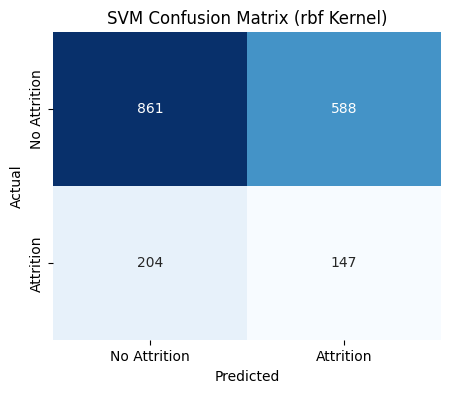


🔹 Training SVM with poly kernel...


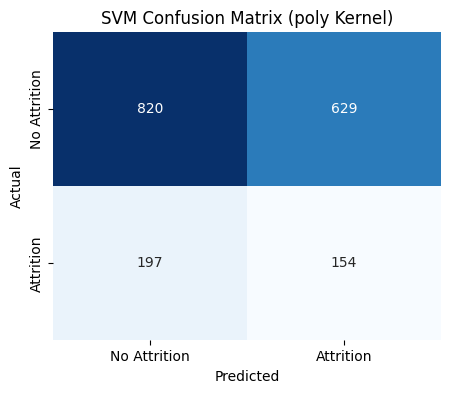

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 7: Train SVM with different kernels
kernels = ['linear', 'rbf', 'poly']
results = {}

for k in kernels:
    print(f"\n🔹 Training SVM with {k} kernel...")

    # Added class_weight='balanced' to handle class imbalance
    model = SVC(kernel=k, probability=True, class_weight='balanced', random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["No Attrition", "Attrition"],
                yticklabels=["No Attrition", "Attrition"])
    plt.title(f"SVM Confusion Matrix ({k} Kernel)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
# Cross-validation (check generalization)
for k in kernels:
    model = SVC(kernel=k, random_state=42)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")
    print(f"✅ Mean CV Accuracy for SVM ({k} kernel): {cv_scores.mean():.4f}")

✅ Mean CV Accuracy for SVM (linear kernel): 0.8053
✅ Mean CV Accuracy for SVM (rbf kernel): 0.8053
✅ Mean CV Accuracy for SVM (poly kernel): 0.8053
